In [27]:
import pandas as pd
#import tensorflow as tf

In [28]:
dataset = pd.read_csv('netflix_titles.csv')

In [29]:
dataset.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


In [30]:
dataset.shape

(6234, 12)

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null object
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


# Cleaning Data

In [32]:
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import io
import math
import numpy as np

In [33]:
original_len = len(dataset)
dropped_df = dataset.dropna()
dropped_len = len(dropped_df)
print(dataset.isnull().sum())
dataset = dropped_df

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64


In [34]:
dataset.drop(columns=['show_id', 'date_added', 'duration', 'description'], inplace=True)

In [36]:
dataset.head()

,type,title,director,cast,country,release_year,rating,listed_in
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,TV-PG,"Children & Family Movies, Comedies"
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,TV-14,Comedies
6,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2014,R,"International Movies, Sci-Fi & Fantasy, Thrillers"
7,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017,TV-MA,Stand-Up Comedy
9,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2014,R,"Action & Adventure, Thrillers"


In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 6213
Data columns (total 8 columns):
type            3774 non-null object
title           3774 non-null object
director        3774 non-null object
cast            3774 non-null object
country         3774 non-null object
release_year    3774 non-null int64
rating          3774 non-null object
listed_in       3774 non-null object
dtypes: int64(1), object(7)
memory usage: 265.4+ KB


In [38]:
dataset['country'] = dataset['country'].map(lambda x: x.split(',')[0])

bag_of_words_data = ['director', 'cast', 'listed_in']

for col in bag_of_words_data:
    dataset[col] = dataset[col].map(lambda x : x.lower().replace(' ', '').split(',')[:3])

dataset['bag_of_words'] = ''
for i, row in dataset.iterrows():
    words = [' '.join(row[col]) for col in bag_of_words_data]
    dataset.loc[i, 'bag_of_words'] = ' '.join(words)
    
dataset.drop(columns=bag_of_words_data, inplace=True)
dataset.head()

,type,title,country,release_year,rating,bag_of_words
0,Movie,Norm of the North: King Sized Adventure,United States,2019,TV-PG,richardfinn timmaltby alanmarriott andrewtoth ...
4,Movie,#realityhigh,United States,2017,TV-14,fernandolebrija nestacooper katewalsh johnmich...
6,Movie,Automata,Bulgaria,2014,R,gabeibáñez antoniobanderas dylanmcdermott mela...
7,Movie,Fabrizio Copano: Solo pienso en mi,Chile,2017,TV-MA,rodrigotoro franciscoschultz fabriziocopano st...
9,Movie,Good People,United States,2014,R,henrikrubengenz jamesfranco katehudson tomwilk...


In [ ]:
#

# Data Information

In [6]:
import matplotlib.pyplot as plt

### Based on type

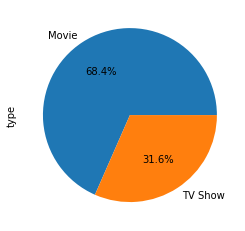

In [7]:
based_on_type=dataset.type.value_counts()
based_on_type.plot.pie(autopct='%1.1f%%')
plt.show()

NameError: name 'dataset_clean' is not defined

I assume we cannot clean the data based on null value, because it will be bad dataset. Do you have any idea?

### Based on Country

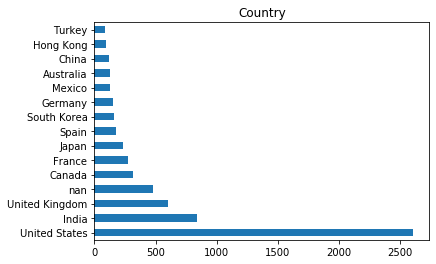

United States     2609
India              838
United Kingdom     601
nan                476
Canada             318
France             271
Japan              231
Spain              178
South Korea        162
Germany            151
Mexico             129
Australia          126
China              120
Hong Kong           97
Turkey              87
dtype: int64


In [12]:
country_ = []

for initial in dataset.country:
    initial = str(initial)
    country = initial.strip('').split(', ')
    for k in country:
        country_.append(k)

country_series=pd.Series(country_)
based_on_country=country_series.value_counts().head(15)
based_on_country.plot.barh()
plt.title('Country')
plt.show()

print(based_on_country)

### Based on date

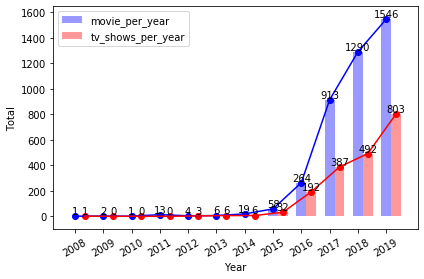

In [16]:
dataset["date_added"] = pd.to_datetime(dataset['date_added'])
dataset['year_added'] = dataset['date_added'].dt.year

movie_per_year=[]
tv_shows_per_year=[]

for i in range(2008,2020):
    h=dataset.loc[(dataset['type']=='Movie') & (dataset.year_added==i)] 
    g=dataset.loc[(dataset['type']=='TV Show') & (dataset.year_added==i)] 
    movie_per_year.append(len(h))
    tv_shows_per_year.append(len(g))

mylist= list(range(2008,2020))

opacity = 0.4
bar_width = 0.35
barlist=[0.35]*12
mynewlist=[x + y for x, y in zip(mylist, barlist)]

plt.xlabel('Year')
plt.ylabel('Total')

plt.xticks(mylist, rotation=30)
bar1 = plt.bar(mylist, movie_per_year, bar_width, align='center', alpha=opacity, color='b', label='movie_per_year')
bar2 = plt.bar(mynewlist, tv_shows_per_year, bar_width, align='center', alpha=opacity, color='r',label='tv_shows_per_year')

# Add counts above the two bar graphs
for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.plot(mylist, movie_per_year, label='Movie',color='b')
plt.plot(mynewlist, tv_shows_per_year, label='TV Shows',color='r')
plt.scatter(mylist, movie_per_year, label='Movie',color='b')
plt.scatter(mynewlist, tv_shows_per_year, label='TV Shows',color='r')
plt.show()

### Based on release_year

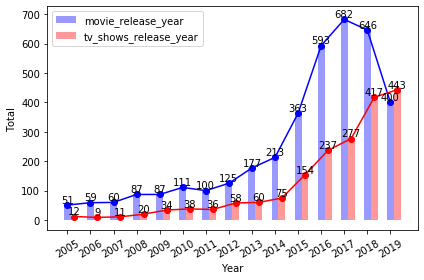

In [40]:
movie_release_year=[]
tv_shows_release_year=[]

for i in range(2005,2020):
    h=dataset.loc[(dataset['type']=='Movie') & (dataset.release_year==i)] 
    g=dataset.loc[(dataset['type']=='TV Show') & (dataset.release_year==i)] 
    movie_release_year.append(len(h))
    tv_shows_release_year.append(len(g))

mylist= list(range(2005,2020))

opacity = 0.4
bar_width = 0.3
barlist=[bar_width]*len(mylist)
mynewlist=[x + y for x, y in zip(mylist, barlist)]

plt.xlabel('Year')
plt.ylabel('Total')

plt.xticks(mylist, rotation=30)
bar1 = plt.bar(mylist, movie_release_year, bar_width, align='center', alpha=opacity, color='b', label='movie_release_year')
bar2 = plt.bar(mynewlist, tv_shows_release_year, bar_width, align='center', alpha=opacity, color='r',label='tv_shows_release_year')

# Add counts above the two bar graphs
for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.plot(mylist, movie_release_year, label='Movie',color='b')
plt.plot(mynewlist, tv_shows_release_year, label='TV Shows',color='r')
plt.scatter(mylist, movie_release_year, label='Movie',color='b')
plt.scatter(mynewlist, tv_shows_release_year, label='TV Shows',color='r')
plt.show()

### Based on Rating

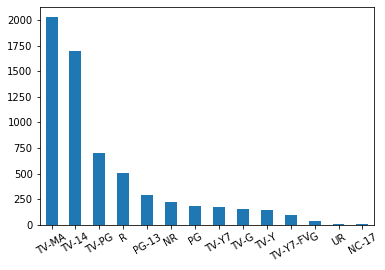

In [68]:
based_on_type=dataset.rating.value_counts()
based_on_type.plot.bar()
plt.xticks(rotation=30)
plt.show()

### Based On Duration

source kaggle.com

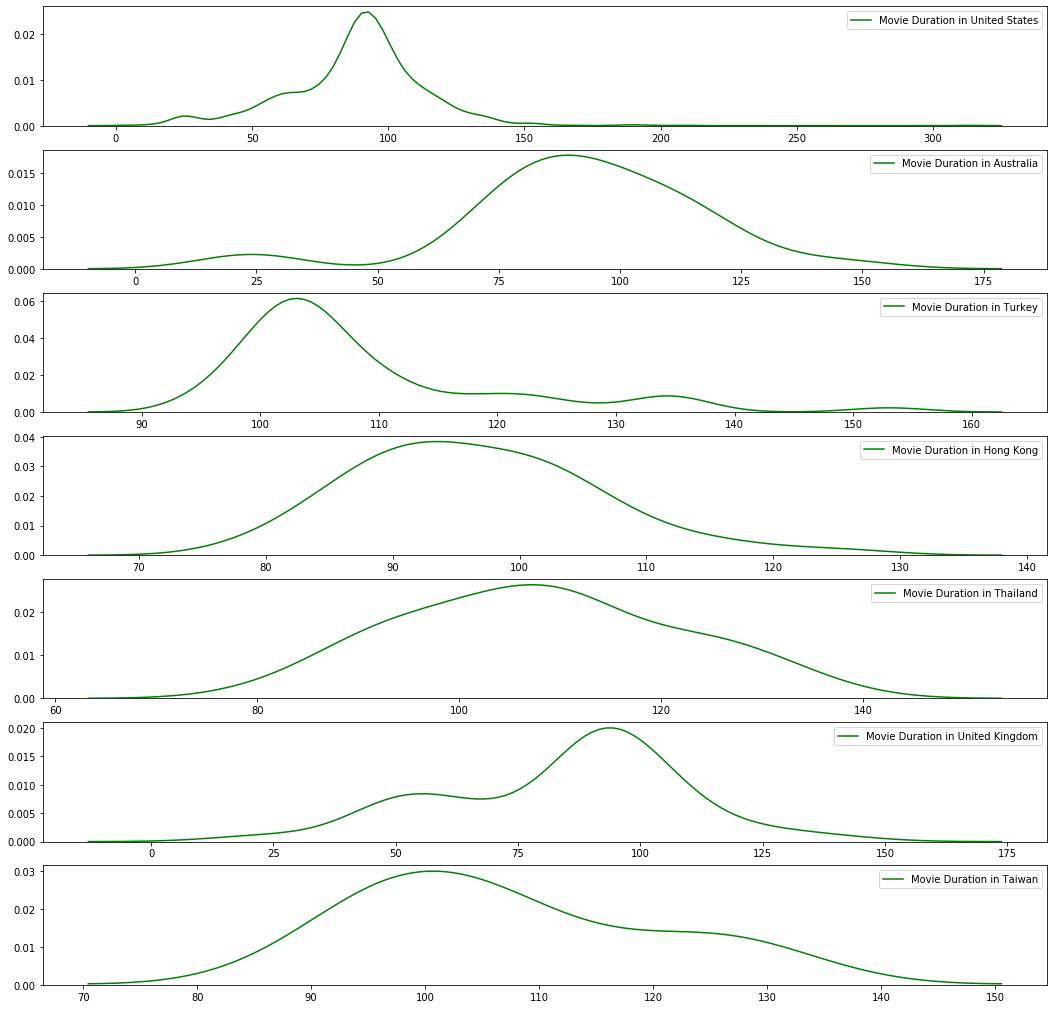

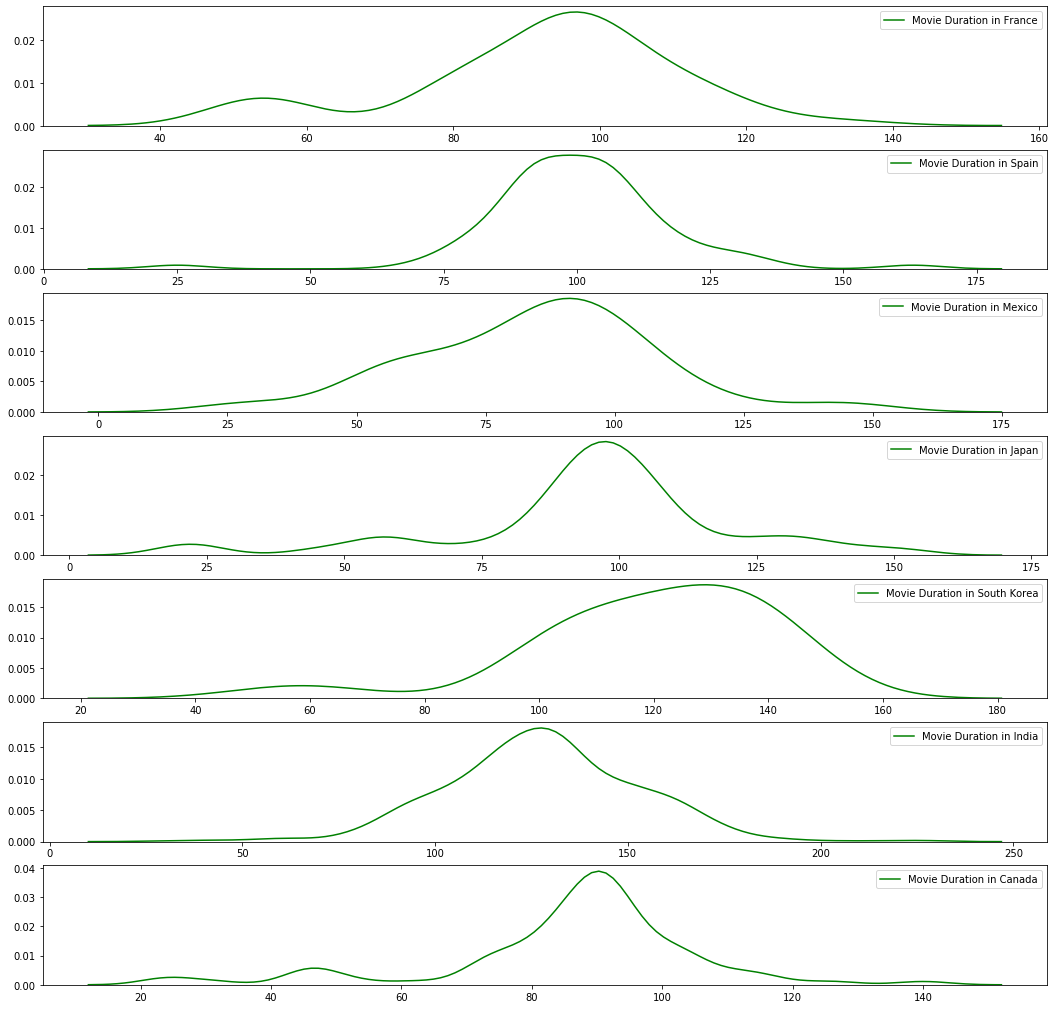

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

countries_0_7=['United States','Australia','Turkey','Hong Kong','Thailand',"United Kingdom",'Taiwan']
countrie_7_14=['France','Spain'
          ,'Mexico','Japan','South Korea','India','Canada']
def country_mov_dur(country):
    netflix_country_dur=dataset.loc[(dataset.country==str(country))&(dataset.type=='Movie')].duration[:]
    # # ' minSeaso' will remove ' Season' and ' min'
    netflix_country_dur=netflix_country_dur.apply(lambda x : int(x.strip(' minSeaso')))
    
    return netflix_country_dur
f, axes = plt.subplots(7,1,figsize=(18,18))
for i in range(7):
    for j in range(1):
        country_mov_duration=country_mov_dur(str(countries_0_7[i]))
        
        sns.kdeplot(country_mov_duration,Label='Movie Duration'+' in '+str(countries_0_7[i]),color='g',ax=axes[i])
        
f, axes = plt.subplots(7,1,figsize=(18,18))
for i in range(7):
    for j in range(1):
        country_mov_duration=country_mov_dur(str(countrie_7_14[i]))
        
        sns.kdeplot(country_mov_duration,Label='Movie Duration'+' in '+str(countrie_7_14[i]),color='g',ax=axes[i])

### Listed_in

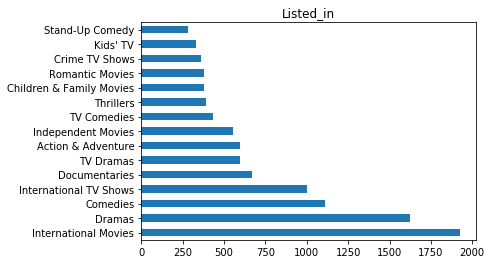

International Movies        1927
Dramas                      1623
Comedies                    1113
International TV Shows      1001
Documentaries                668
TV Dramas                    599
Action & Adventure           597
Independent Movies           552
TV Comedies                  436
Thrillers                    392
Children & Family Movies     378
Romantic Movies              376
Crime TV Shows               363
Kids' TV                     328
Stand-Up Comedy              281
dtype: int64


In [69]:
listed_in_ = []

for initial in dataset.listed_in:
    initial = str(initial)
    listed_in = initial.strip('').split(', ')
    for k in listed_in:
        listed_in_.append(k)

listed_in_series=pd.Series(listed_in_)
based_on_listed_in=listed_in_series.value_counts().head(15)
based_on_listed_in.plot.barh()
plt.title('Listed_in')
plt.show()

print(based_on_listed_in)